##### Copyright 2018 The TensorFlow Authors.
https://www.tensorflow.org/tutorials/keras/classification

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# 첫 번째 신경망 훈련하기: 기초적인 분류 문제

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />TensorFlow.org에서 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />깃허브(GitHub) 소스 보기</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

Note: 이 문서는 텐서플로 커뮤니티에서 번역했습니다. 커뮤니티 번역 활동의 특성상 정확한 번역과 최신 내용을 반영하기 위해 노력함에도
불구하고 [공식 영문 문서](https://www.tensorflow.org/?hl=en)의 내용과 일치하지 않을 수 있습니다.
이 번역에 개선할 부분이 있다면
[tensorflow/docs-l10n](https://github.com/tensorflow/docs-l10n/) 깃헙 저장소로 풀 리퀘스트를 보내주시기 바랍니다.
문서 번역이나 리뷰에 참여하려면
[docs-ko@tensorflow.org](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs-ko)로
메일을 보내주시기 바랍니다.

이 튜토리얼에서는 운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델을 훈련합니다. 상세 내용을 모두 이해하지 못해도 괜찮습니다. 여기서는 완전한 텐서플로(TensorFlow) 프로그램을 빠르게 살펴 보겠습니다. 자세한 내용은 앞으로 배우면서 더 설명합니다.

여기에서는 텐서플로 모델을 만들고 훈련할 수 있는 고수준 API인 [tf.keras](https://www.tensorflow.org/guide/keras)를 사용합니다.

In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [3]:
print(data_dir)

C:\Users\samsung\.keras\datasets\flower_photos


## 데이터 변환하기

### 다운로드된 디렉토리의 이미지 파일을 읽어서 이미지 numpy array를 만든다

In [4]:
# 이미지 파일을 포함하고 있는 디렉토리를 읽어온다.
# data_dir 구조는 아래와 같고, sub_dir가 label을 의미한다
# ```bash
# - flower_photos
#  ├─daisy
#  ├─dandelion
#  ├─roses
#  ├─sunflowers
#  └─tulips
# ```
import os

def get_sub_directories(root):
    items = os.listdir(root)
    paths = []
    label_n_index = {}
    label_count = 0
    for item in items:
        if os.path.isdir(os.path.join(root, item)):
            paths.append(os.path.join(root, item))
            label_n_index[item] = label_count
            label_count = label_count + 1
    return paths, label_n_index
        
        
(sub_directory_paths, label_n_index) = get_sub_directories(str(data_dir.absolute()))

In [5]:
print(sub_directory_paths)
print(label_n_index)

['C:\\Users\\samsung\\.keras\\datasets\\flower_photos\\daisy', 'C:\\Users\\samsung\\.keras\\datasets\\flower_photos\\dandelion', 'C:\\Users\\samsung\\.keras\\datasets\\flower_photos\\roses', 'C:\\Users\\samsung\\.keras\\datasets\\flower_photos\\sunflowers', 'C:\\Users\\samsung\\.keras\\datasets\\flower_photos\\tulips']
{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


In [7]:
import glob
from PIL import Image

In [8]:
def get_image_numpy(path, label_n_index):
    def __convert__(target):
        return np.stack(target)
    img_height = 180
    img_width = 180
    images = os.listdir(path)
    count = 0
    images1 = []
    image1_labels = []
    images2 = []
    image2_labels = []
    for image in images:
        split_last_index = path.rindex('\\')
        if split_last_index < 0:
            continue
            
        # 이미지를 180x180 형태로 읽는다
        img_array = np.array(Image.open(os.path.join(path, image)).resize((img_height, img_width)))
        # 컬러 이미지이기때문에 흑백 이미지로 변환시켜준다
        img_array = img_array[:,:,0]
        dir_name = path[(split_last_index + 1):]
        index = label_n_index[dir_name] #이미지에 맞는 라벨(클래스)을 찾아준다
        if count >= (len(images)/2): #절반은 train 데이터로, 나머지는 test 데이터로 사용한다
            image2_labels.append(index)
            images2.append(img_array)
        else:
            image1_labels.append(index)
            images1.append(img_array)
        count = count + 1
    return  (__convert__(images1), __convert__(image1_labels), __convert__(images2), __convert__(image2_labels))
        

train_image_list = []
test_image_list = []
train_label_list = []
test_label_list = []
for path in sub_directory_paths:
    train_image, train_label, test_image, test_label = get_image_numpy(path, label_n_index)
    train_image_list.append(train_image)
    train_label_list.append(train_label)
    test_image_list.append(test_image)
    test_label_list.append(test_label)

In [9]:
print(train_image_list)
print(train_image_list[0].shape)

[array([[[136, 142, 146, ..., 153, 154, 152],
        [134, 141, 146, ..., 154, 154, 151],
        [134, 140, 145, ..., 153, 152, 148],
        ...,
        [ 44,  44,  44, ..., 130, 130, 130],
        [ 45,  44,  44, ..., 131, 130, 129],
        [ 44,  44,  44, ..., 132, 131, 131]],

       [[212, 208, 213, ...,   9,  12,   9],
        [216, 219, 216, ...,  10,   9,   7],
        [222, 220, 222, ...,  13,   9,   7],
        ...,
        [189, 198, 207, ..., 168, 181, 182],
        [218, 219, 222, ..., 170, 181, 176],
        [229, 227, 229, ..., 171, 183, 176]],

       [[135, 129, 122, ..., 167, 161, 146],
        [131, 116, 105, ..., 161, 147, 131],
        [119, 105,  95, ..., 129, 129, 125],
        ...,
        [ 28,  28,  28, ...,  52,  51,  53],
        [ 26,  25,  26, ...,  53,  53,  52],
        [ 24,  22,  25, ...,  54,  50,  48]],

       ...,

       [[149, 140, 121, ...,  31,  36,  66],
        [156, 147, 124, ...,  36,  40,  57],
        [160, 149, 126, ...,  48,  48,  4

In [10]:
# 3차원 numpy array 모음을 갖고 있는 list를 하나로 합친다
def concate_3d_array_list(my_3d_list):
    return np.concatenate(my_3d_list, axis=0)

In [11]:
train_images = concate_3d_array_list(train_image_list)
test_images = concate_3d_array_list(test_image_list)
train_labels = concate_3d_array_list(train_label_list)
test_labels = concate_3d_array_list(test_label_list)

In [12]:
print(train_images.shape)
print(train_labels.shape)

(1837, 180, 180)
(1837,)


신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다. 이렇게 하려면 255로 나누어야 합니다. *훈련 세트*와 *테스트 세트*를 동일한 방식으로 전처리하는 것이 중요합니다:

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [14]:
# {'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}
class_names = [item for item in label_n_index]

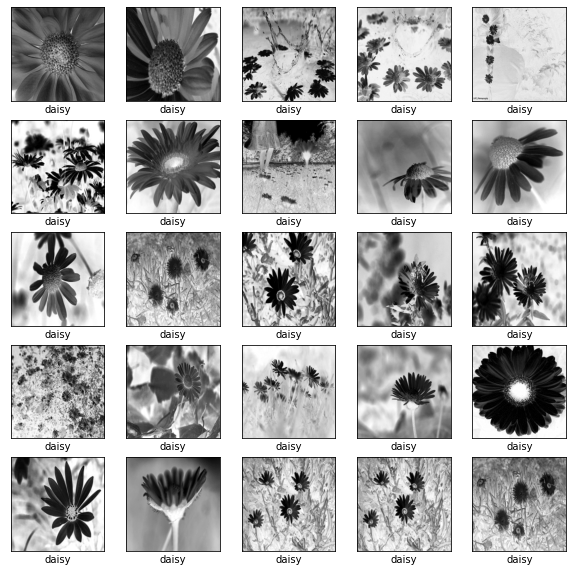

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성

신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.

### 층 설정

신경망의 기본 구성 요소는 *층*(layer)입니다. 층은 주입된 데이터에서 표현을 추출합니다. 아마도 문제를 해결하는데 더 의미있는 표현이 추출될 것입니다.

대부분 딥러닝은 간단한 층을 연결하여 구성됩니다. `tf.keras.layers.Dense`와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됩니다.

In [16]:
img_height = 180
img_width = 180
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(img_height, img_width)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

이 네트워크의 첫 번째 층인 `tf.keras.layers.Flatten`은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환합니다. 이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘립니다. 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 합니다.

픽셀을 펼친 후에는 두 개의 `tf.keras.layers.Dense` 층이 연속되어 연결됩니다. 이 층을 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층이라고 부릅니다. 첫 번째 `Dense` 층은 128개의 노드(또는 뉴런)를 가집니다. 두 번째 (마지막) 층은 10개의 노드의 *소프트맥스*(softmax) 층입니다. 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1입니다. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력합니다.

### 모델 컴파일

모델을 훈련하기 전에 필요한 몇 가지 설정이 모델 *컴파일* 단계에서 추가됩니다:

* *손실 함수*(Loss function)-훈련 하는 동안 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.
* *옵티마이저*(Optimizer)-데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.
* *지표*(Metrics)-훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 *정확도*를 사용합니다.

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 훈련

신경망 모델을 훈련하는 단계는 다음과 같습니다:

1. 훈련 데이터를 모델에 주입합니다-이 예에서는 `train_images`와 `train_labels` 배열입니다.
2. 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.
3. 테스트 세트에 대한 모델의 예측을 만듭니다-이 예에서는 `test_images` 배열입니다. 이 예측이 `test_labels` 배열의 레이블과 맞는지 확인합니다.

훈련을 시작하기 위해 `model.fit` 메서드를 호출하면 모델이 훈련 데이터를 학습합니다:

In [18]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
58/58 [==============================] - 2s 27ms/step - loss: 10.6528 - accuracy: 0.2086: 0s - loss: 11.2205 - accuracy: 0.2
Epoch 2/5
58/58 [==============================] - 1s 25ms/step - loss: 2.2751 - accuracy: 0.2694
Epoch 3/5
58/58 [==============================] - 2s 29ms/step - loss: 1.8811 - accuracy: 0.3073
Epoch 4/5
58/58 [==============================] - 2s 43ms/step - loss: 1.6511 - accuracy: 0.3614 0s - loss: 1.633
Epoch 5/5
58/58 [==============================] - 2s 28ms/step - loss: 1.9202 - accuracy: 0.3490


모델이 훈련되면서 손실과 정확도 지표가 출력됩니다. 이 모델은 훈련 세트에서 약 0.88(88%) 정도의 정확도를 달성합니다.

## 정확도 평가

그다음 테스트 세트에서 모델의 성능을 비교합니다:

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

58/58 - 0s - loss: 2.0926 - accuracy: 0.1959

테스트 정확도: 0.19585378468036652


테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮습니다. 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 *과대적합*(overfitting) 때문입니다. 과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말합니다.

## 예측 만들기

훈련된 모델을 사용하여 이미지에 대한 예측을 만들 수 있습니다.

In [20]:
predictions = model.predict(test_images)

여기서는 테스트 세트에 있는 각 이미지의 레이블을 예측했습니다. 첫 번째 예측을 확인해 보죠:

In [21]:
predictions[0]

array([5.1252985e-01, 8.9616612e-02, 3.5663363e-01, 2.3056069e-02,
       1.8163864e-02, 2.0854549e-11, 7.8524196e-14, 2.9746781e-14,
       3.2827616e-17, 7.5770560e-27], dtype=float32)

이 예측은 10개의 숫자 배열로 나타납니다. 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다. 가장 높은 신뢰도를 가진 레이블을 찾아보죠:

In [22]:
np.argmax(predictions[0])

0

모델은 이 이미지가 앵클 부츠(`class_name[9]`)라고 가장 확신하고 있습니다. 이 값이 맞는지 테스트 레이블을 확인해 보죠:

In [23]:
test_labels[0]

0

10개 클래스에 대한 예측을 모두 그래프로 표현해 보겠습니다:

In [24]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인해 보겠습니다.

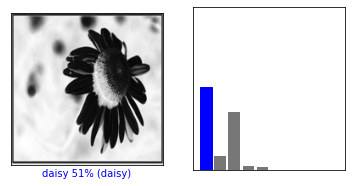

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

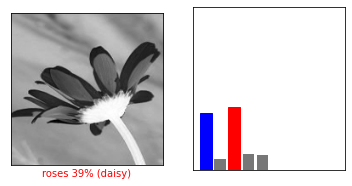

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

몇 개의 이미지의 예측을 출력해 보죠. 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색입니다. 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)입니다. 신뢰도 점수가 높을 때도 잘못 예측할 수 있습니다.

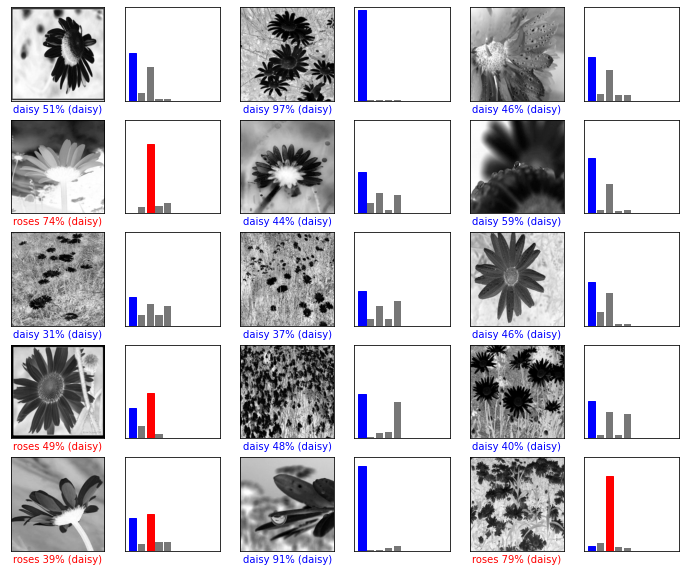

In [27]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만듭니다.

In [28]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(180, 180)


`tf.keras` 모델은 한 번에 샘플의 묶음 또는 *배치*(batch)로 예측을 만드는데 최적화되어 있습니다. 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 합니다:

In [29]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 180, 180)


이제 이 이미지의 예측을 만듭니다:

In [30]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.1252556e-01 8.9616716e-02 3.5663813e-01 2.3055876e-02 1.8163694e-02
  2.0854773e-11 7.8522936e-14 2.9746642e-14 3.2827592e-17 7.5770221e-27]]


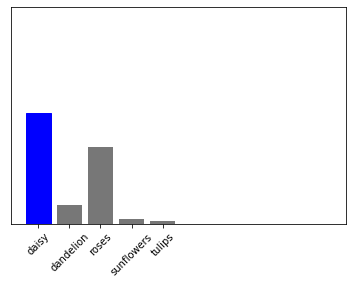

In [31]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(len(class_names)), class_names, rotation=45)

`model.predict`는 2차원 넘파이 배열을 반환하므로 첫 번째 이미지의 예측을 선택합니다:

In [32]:
np.argmax(predictions_single[0])

0

이전과 마찬가지로 모델의 예측은 레이블 9입니다.